In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
airbnb = pd.read_csv("Data/processed-data/nyc-airbnb-listings-2024-cleaned.csv")

# Initialilze the features 
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

airbnb_filtered = airbnb[(airbnb['price'] < airbnb['price'].quantile(0.95)) & (airbnb['minimum_nights'] < airbnb['minimum_nights'].quantile(0.95))]

# Selecting the features and standardizing 
X = airbnb_filtered[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gives us the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

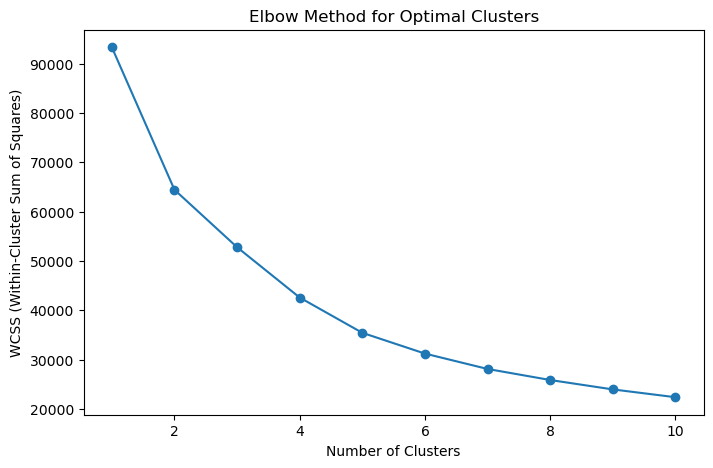

In [18]:
# Plotting the Elbow Method graph
plt.figure(figsize = (8, 5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

The graph above utilizes the Elbow Method to determine the optimal number of clusters for K-Means Clustering on the NYC Airbnb dataset. The y-axis represents the WCSS (Within-Cluster Sum of Squares), which measures the total variance within each individual cluster, while the x-axis shows the number of clusters into which the dataset can be grouped. A key observation from this graph is that the "elbow" point occurs at approximately 4 clusters, indicating that the NYC Airbnb listings can be optimally grouped into 4 distinct clusters. These clusters could be based on various Airbnb listing attributes, such as price, availability, and reviews.

In [19]:
# Makes sure airbnb_filtered is a new DataFrame; not a slice
airbnb_filtered = airbnb_filtered.copy()

# With optimal cluster = 4, we apply K-Means Clustering
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init=10)
airbnb_filtered['cluster'] = kmeans.fit_predict(X_scaled)

# Using PCA to reduce dimensions for visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
airbnb_filtered['pca1'] = X_pca[:, 0]
airbnb_filtered['pca2'] = X_pca[:, 1]


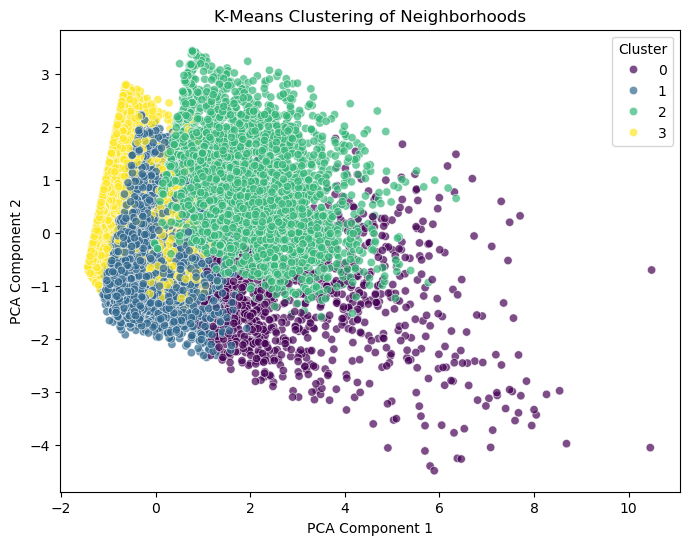

In [20]:
# Plotting scatterplot graph
plt.figure(figsize=(8, 6))
sns.scatterplot(data = airbnb_filtered, x='pca1', y='pca2', hue=airbnb_filtered['cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Neighborhoods')
plt.legend(title="Cluster")
plt.show()

The output above is a K-Means Clustering plot that visualizes how Airbnb listings in NYC have been grouped, given their features. The x-axis and y-axis represent PCA (Principal Component Analysis) components, where PCA is used to reduce dimensionality of the data which maintaining its structure. Additionally, let's note that each individual point represents a single Airbnb listing in the dataset while each color represents a different cluster, where cluster represents a group of neighborhoods with similar Airbnb characteristics. Overall, this is crucial for investors to help identify which areas are optimal for different Airbnb business models and allow Airbnb hosts to develop stratetigic pricing strategies.